# Micro_Credit Loan Prediction

Problem Statement:
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donorsare supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFShas been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They arecollaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be6(in Indonesian Rupiah), while, for the loan amount of 10(in Indonesian Rupiah), the payback amount should be 12(in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  




# Quick navigation
1. Introduction
2. Data Reading and Analysis
3. Data Exploration
4. Data Visualization
5. Model Training

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Importing Dataset

In [17]:
data=pd.read_csv('Data file.csv')

In [18]:
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [19]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# Understanding the Data

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55991 entries, 0 to 55990
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   label                 55991 non-null  int64  
 1   msisdn                55991 non-null  object 
 2   aon                   55991 non-null  float64
 3   daily_decr30          55991 non-null  float64
 4   daily_decr90          55991 non-null  float64
 5   rental30              55991 non-null  float64
 6   rental90              55991 non-null  float64
 7   last_rech_date_ma     55991 non-null  float64
 8   last_rech_date_da     55991 non-null  float64
 9   last_rech_amt_ma      55991 non-null  int64  
 10  cnt_ma_rech30         55991 non-null  int64  
 11  fr_ma_rech30          55991 non-null  float64
 12  sumamnt_ma_rech30     55991 non-null  int64  
 13  medianamnt_ma_rech30  55991 non-null  float64
 14  medianmarechprebal30  55990 non-null  float64
 15  cnt_ma_rech90      

## Everthing looks perfect, there is no null or missing values in this data set

## we can observe that there is three object type attributes are there .They are msisdn,pcircle,pdate

In [20]:
# checking null values 
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
# number of rows and columns
print("shape of data set is ",data.shape)

shape of data set is  (31147, 36)


# Data Preprocessing
1. Remove columns where number of unique value is only 1.
Let's look at no of unique values for each column.We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis


In [21]:
unik = data.nunique()
unik = unik[unik.values == 1]
data.drop(labels = list(unik.index), axis =1, inplace=True)
print(" we are left with",data.shape ,"rows & columns.")

 we are left with (209593, 35) rows & columns.


In [22]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [23]:
## data Description
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [24]:
data.describe(include=['object','datetime']).transpose()

,count,unique,top,freq
msisdn,209593,186243,04581I85330,7
pdate,209593,82,2016-07-04,3150


## Summary statistics shows all the statistics of our dataset i.e. mean, median and other calculation.
## Mean is greater than median in all the columns so aur data is right skewed.
## The difference between 75% and maximum is higher that's why outliers are removed which needs to be removed.
## The pdate column tells the date when the data is collect. It contains only three month data.
## msidn is a mobile number of user and mobile number is unique for every customers. 

**#There are only 186243 unique number out of 209593 so rest of the data is duplicates entry so we have to remove those entry.**

In [25]:
data1=data.copy()
#Deleting the duplicates entry in msidn column
data = data.drop_duplicates(subset = 'msisdn',keep='first')
data.shape

(186243, 35)

# Data Exploration
### Printing the object datatypes and their unique values.

In [26]:
for column in data.columns:
    if data[column].dtypes == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print('\n')
        print('\n')

msisdn : ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']




pdate : ['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-11' '2016-07-27' '2016-07-23' '2016-08-16'
 '2016-08-15' '2016-06-02' '2016-06-05' '2016-08-02' '2016-07-28'
 '2016-07-18' '2016-08-18' '2016-07-16' '2016-07-29' '2016-07-21'
 '2016-06-03' '2016-06-13' '2016-08-01' '2016-07-13' '2016-07-10'
 '2016-06-09' '2016-07-15' '2016-07-11' '2016-08-09' '2016-08-12'
 '2016-07-22' '2016-06-04' '2016-07-24' '2016-06-18' '2016-08-13'
 '2016-06-17' '2016-08-07' '20

Observation:

contains only one circle area data. So it have not any impact in our model if we drop this feature.

In [ ]:
# Printing the float datatype columns and number of unique values in the particular columns.

for column in data.columns:
    if data[column].dtype==np.number:
        print(str(column) + ' : ' + str(data[column].nunique()))
        print('\n')

aon : 4282


daily_decr30 : 130323


daily_decr90 : 139842


rental30 : 117881


rental90 : 125595


last_rech_date_ma : 1061


last_rech_date_da : 1061


fr_ma_rech30 : 961


sumamnt_ma_rech30 : 13130


medianamnt_ma_rech30 : 501


medianmarechprebal30 : 28486


medianamnt_ma_rech90 : 602


medianmarechprebal90 : 28064


cnt_da_rech30 : 949


fr_da_rech30 : 960


maxamnt_loans30 : 924


medianamnt_loans30 : 6


cnt_loans90 : 968


medianamnt_loans90 : 6


payback30 : 1249


payback90 : 2128




In [ ]:
#Checking the number of number of defaulter and non defaulter customers.
data['label'].value_counts()

1    160383
0     25860
Name: label, dtype: int64

In [ ]:
#Checking the defaulter customers percentage wise.
data['label'].value_counts(normalize=True) *100

1    86.114914
0    13.885086
Name: label, dtype: float64

Observation:

*   After seeing the label column which is also our target feature for this dataset it is clearly shown that 86.11% of
data is label 1 and only 13.8% of data is label 0 so our dataset is implanced. So before making the ML model first we have to do sampling to get rid off imblance dataset




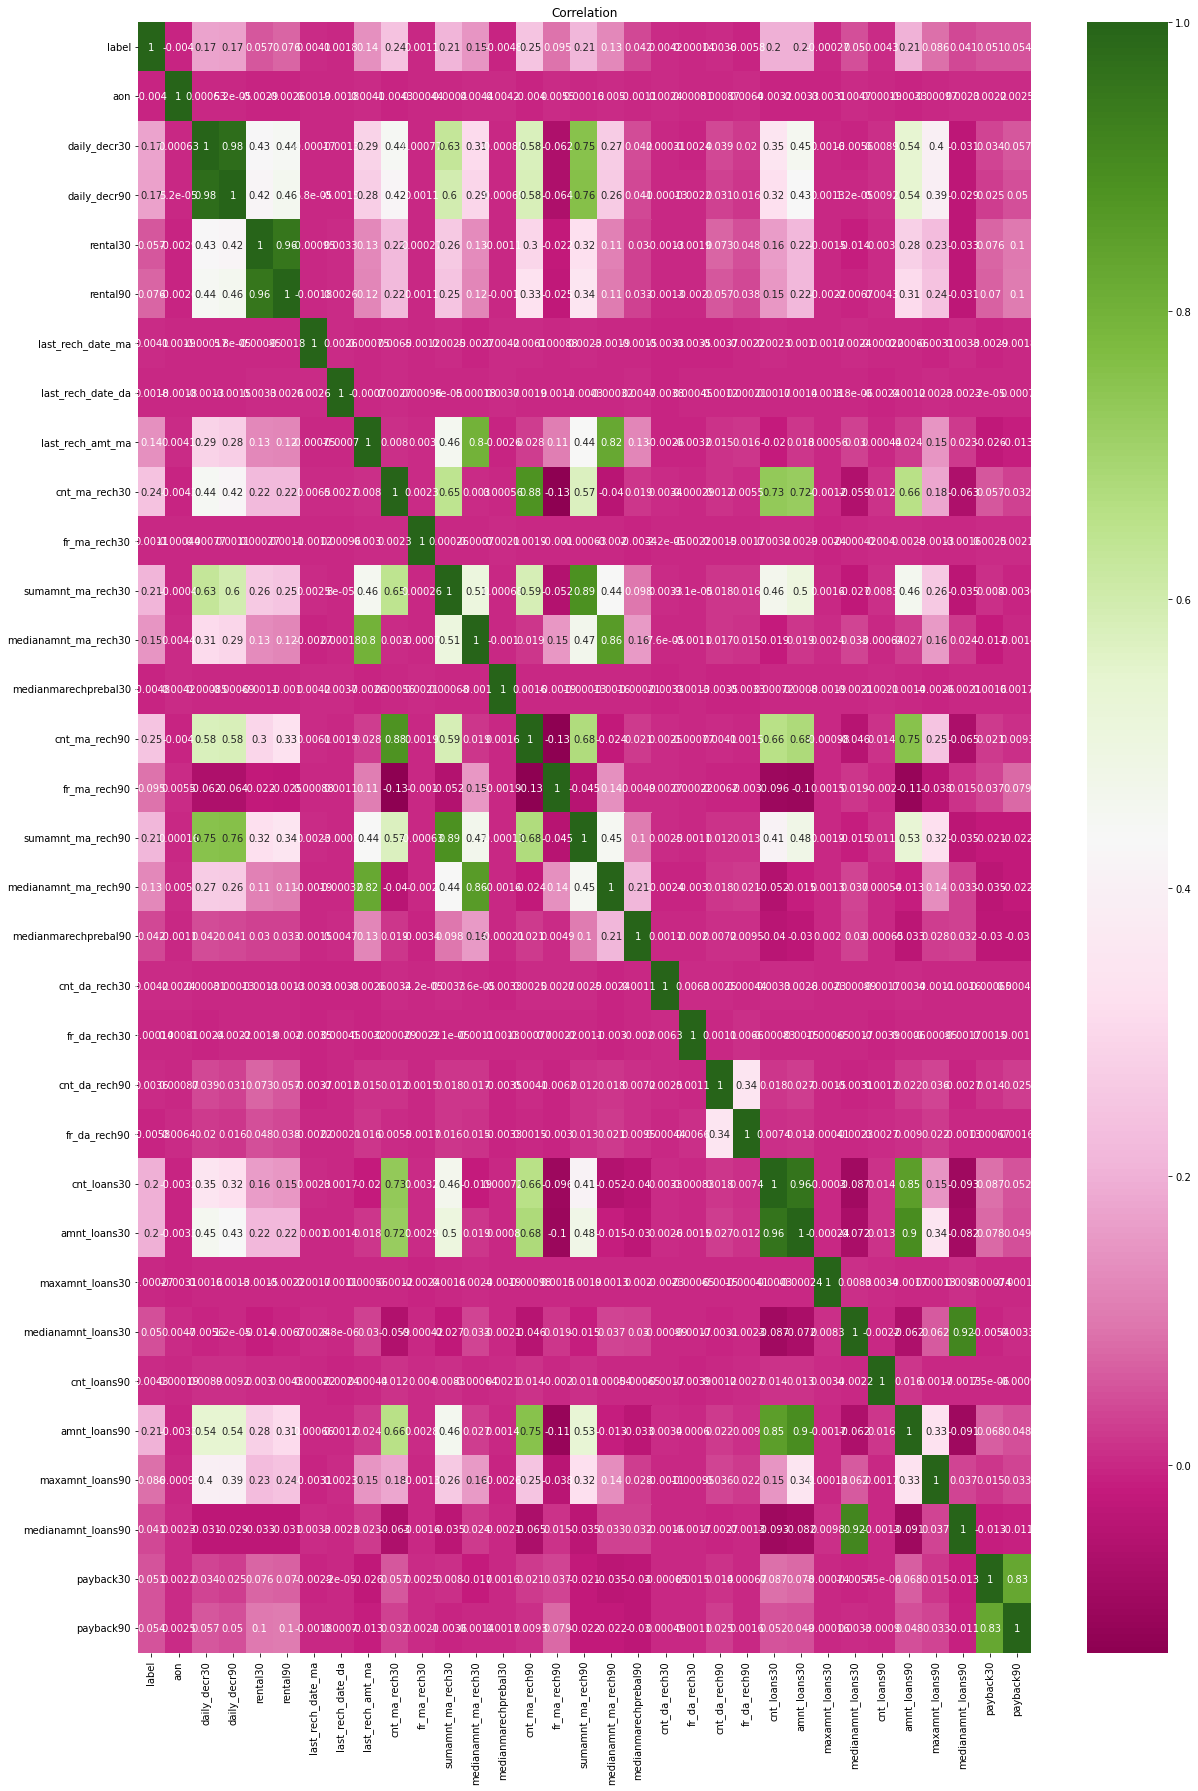

In [ ]:
# correlation heatmap
plt.figure(figsize = [20, 30])
sns.heatmap(data.corr(),cmap="PiYG", annot = True)
plt.title('Correlation')
plt.show()

Observation:
* daily_decr30 and daily_decr90 features are highly correlated with each otheer.
* rental30 and rental90 features are highly correlated with each other.
* cnt_loans30 and amount_loans30 columns are highly correlated with each other.
* medianamnt_loans30 and medianamnt_loans90 is highly correlated with each other.
*   amount_loans30 is also highly correlated with amount_loans90 column.
* We have to drop one of the features which are highly correlated with other features. And if we dont do this then our model will face multicolinearity problem.


In [27]:
#Dropping the columns which is highly correlated with each other do avoid multicolinearity problem.
## Dropping 30 days data as we have a 90 days data as well
data.drop(columns=['daily_decr30','rental30','amnt_loans30','medianamnt_loans30'],axis=1, inplace = True)
#Now checking the shape
print(data.shape)

(186243, 31)


In [28]:
#Checking the unique value in pdate column.
data['pdate'].nunique()

82

In [29]:
#Making the new column Day, Month and year from pdate column
data['pDay']=pd.to_datetime(data['pdate'],format='%Y/%m/%d').dt.day
data['pMonth']=pd.to_datetime(data['pdate'],format='%Y/%m/%d').dt.month
data['pYear']=pd.to_datetime(data['pdate'],format='%Y/%m/%d').dt.year
data.head()

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,pDay,pMonth,pYear
0,0,21408I70789,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
2,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
3,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
4,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016


In [30]:
#Checking the number of months 
data['pMonth'].unique()

array([7, 8, 6])

In [31]:
# Dropping pdate column because it has not any significant role.
data.drop(columns=['pdate'],axis=1, inplace = True)

In [32]:
#Seprate the categorical columns and Numerical columns
cat_data,num_data=[],[]

for i in data.columns:
    if data[i].dtype==object:
        cat_data.append(i)
    elif (data[i].dtypes=='int64') | (data[i].dtypes=='float64') | (data[i].dtypes=='int32'):
        num_data.append(i)
    else: continue

print(' Total Number of Feature::', data.shape[1])
print('\n Number of categorical features::', len(cat_data))
print('\n Number of Numerical Feature::', len(num_data))

 Total Number of Feature:: 33

 Number of categorical features:: 1

 Number of Numerical Feature:: 32


# Data Visualization

Text(0.5, 1.0, 'Correlation with label column')

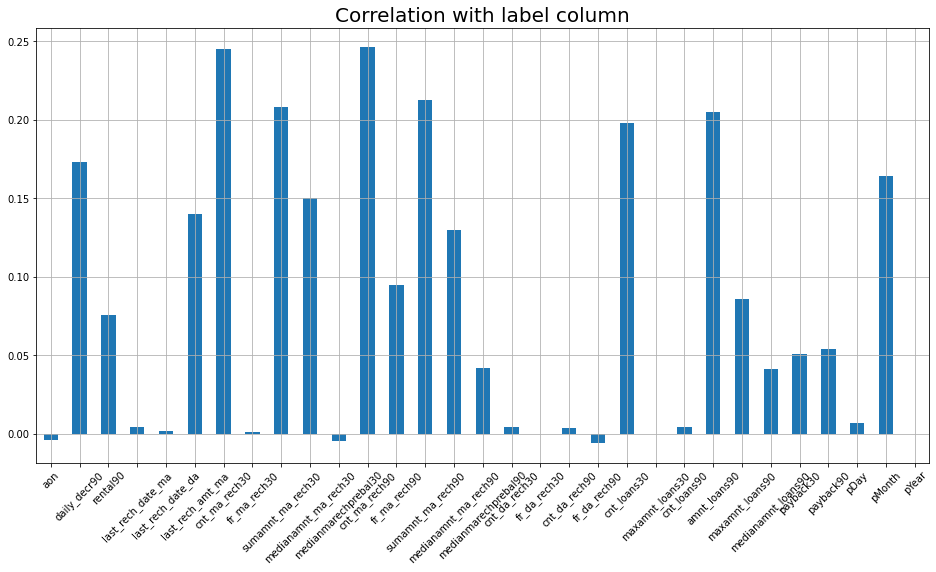

In [ ]:
#Checking the correlation with target variable
plt.figure(figsize=(16,8))
data.drop('label', axis=1).corrwith(data['label']).plot(kind='bar',grid=True)
plt.xticks(rotation=45)
plt.title("Correlation with label column",fontsize=20)

## Observation:

Here we see the correlation of the columns with respect to the target column that is label.

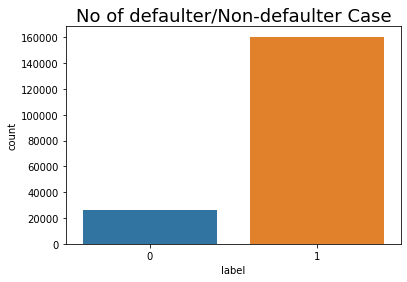

In [ ]:
#Checking the number of Fraud cases.
sns.countplot(x='label', data=data)
plt.title('No of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

Observation:

Label 1 indicates loan has been payed i.e Non-Defaulter and label 0 indicates indicates that the loan has not beenpayed i.e. defaulter.

cases of defaults are very less this shows skewness in data

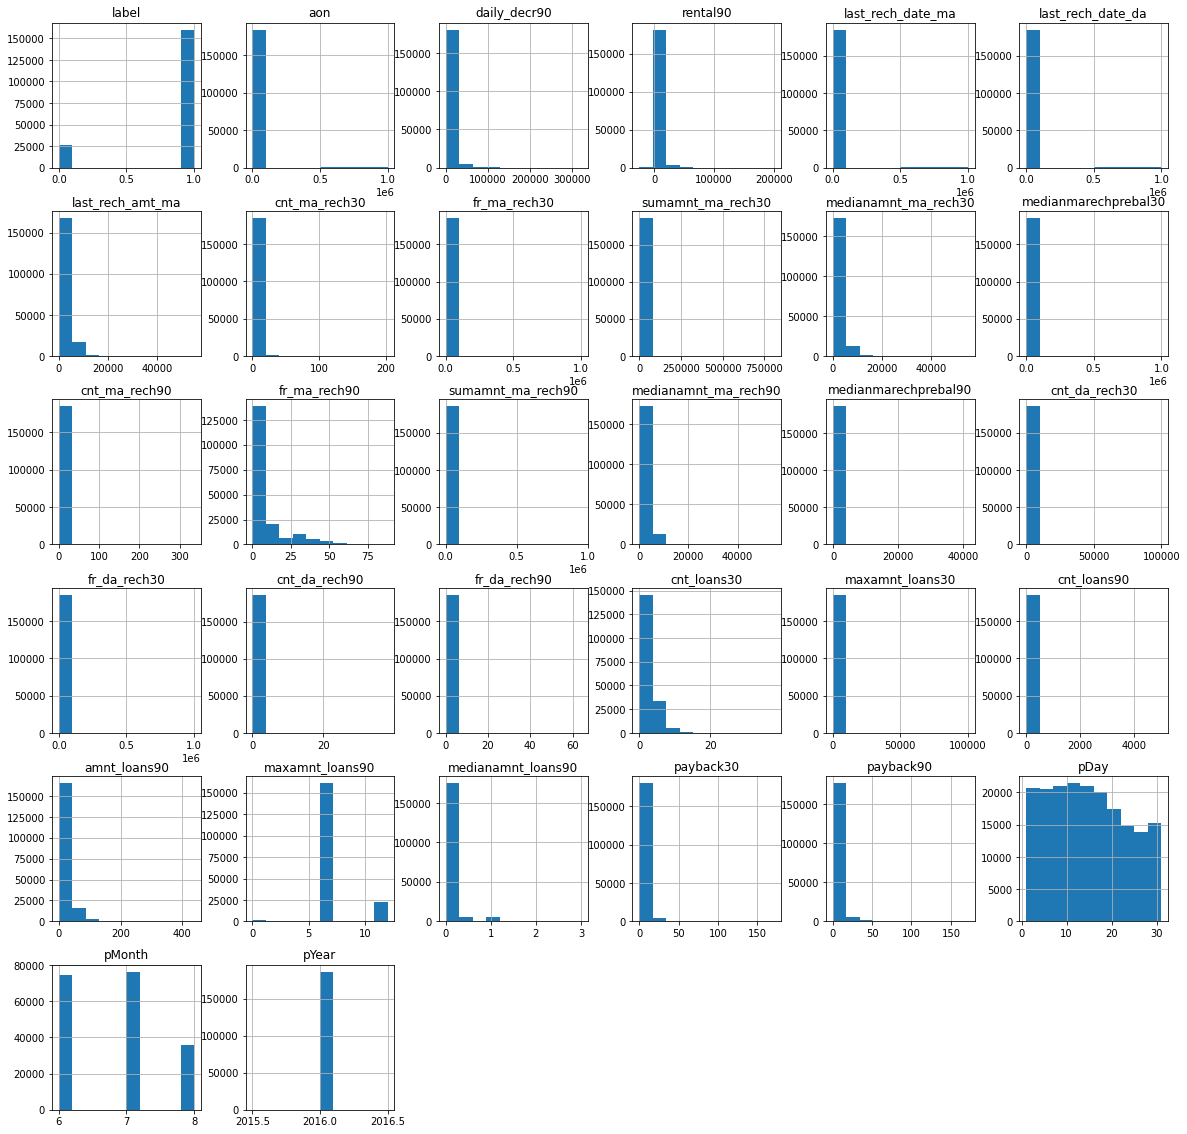

In [ ]:
#Plotting the Histogram
data.hist(figsize=(20,20))
plt.show()

# Observation:

We plot the histogram to display the shape and spread of continuous sample data.In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range

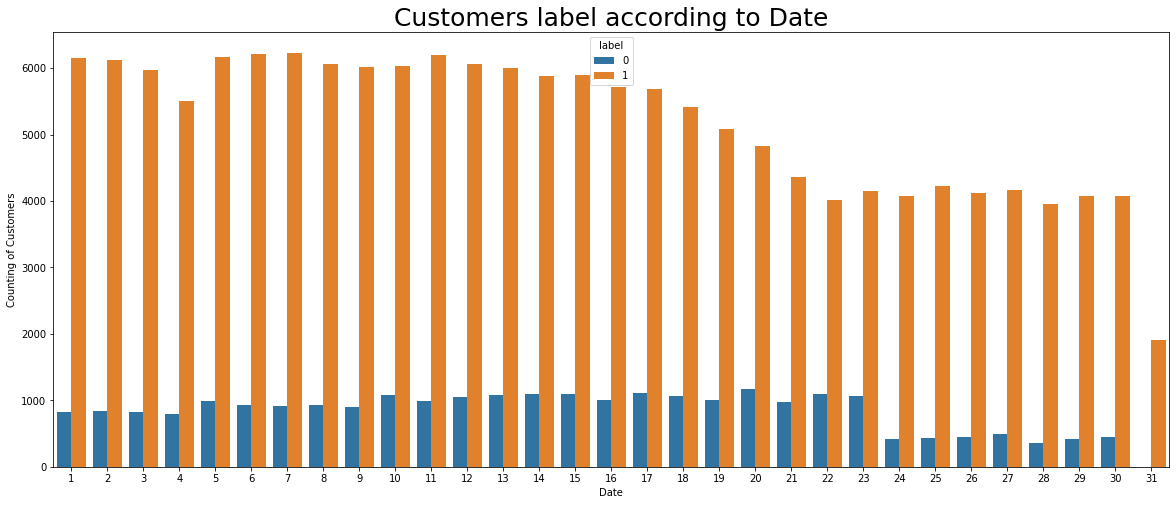

In [ ]:
#Customer label according to Date
plt.figure(figsize=(20,8))
sns.countplot(x="pDay", hue='label', data=data,)
plt.title("Customers label according to Date", fontsize=25)
plt.xlabel('Date')
plt.ylabel('Counting of Customers')
plt.show()


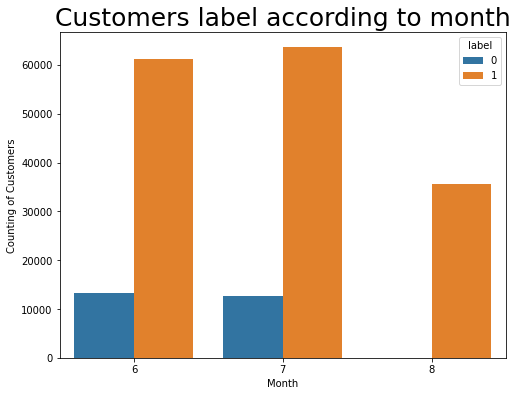

In [ ]:
#Customer label according to Month
plt.figure(figsize=(8,6))
sns.countplot(x="pMonth", hue='label', data=data)
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()


## Observation:
1.   The first figure which is date vs label shows that the customers who did not pay their loans are from date 10 to 23.
2.   There are severals customers at June and July month who did not pay their loan.




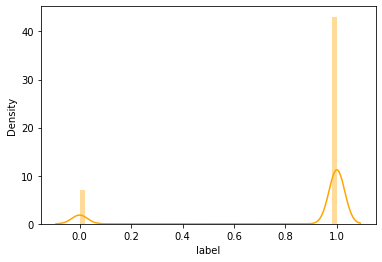

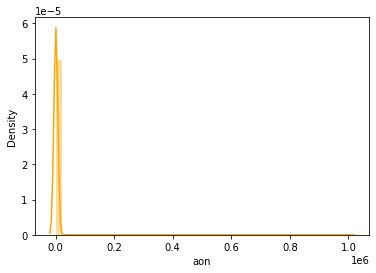

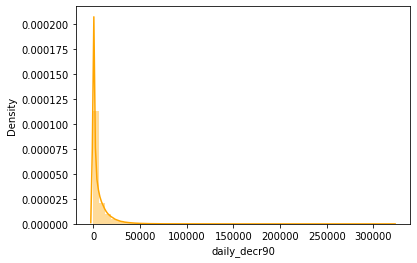

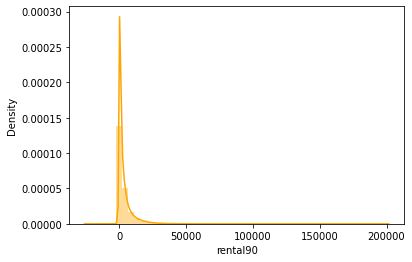

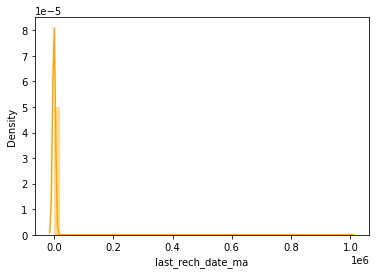

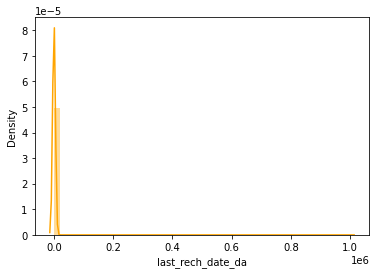

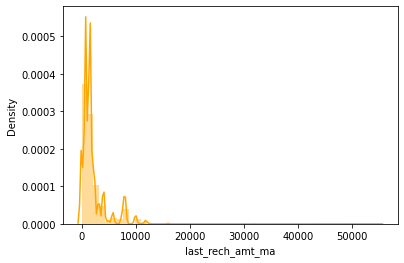

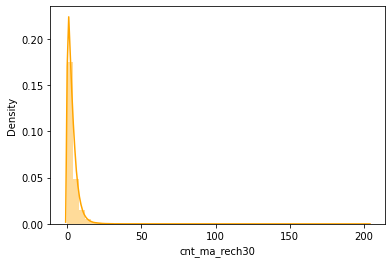

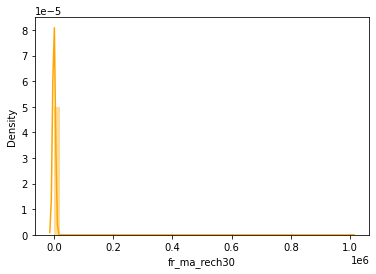

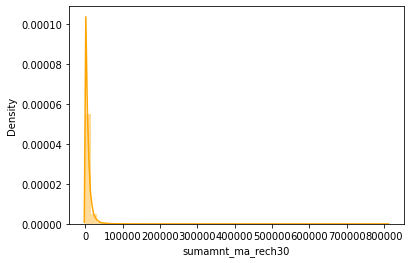

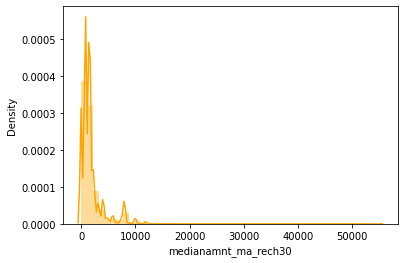

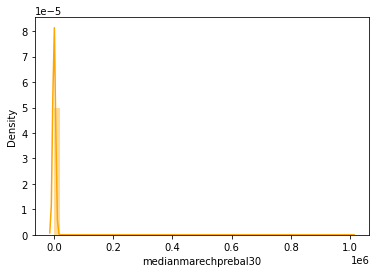

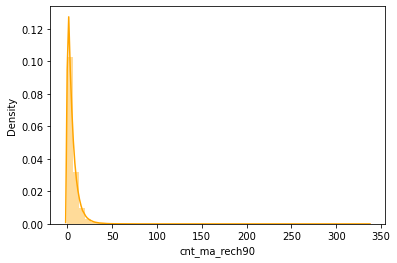

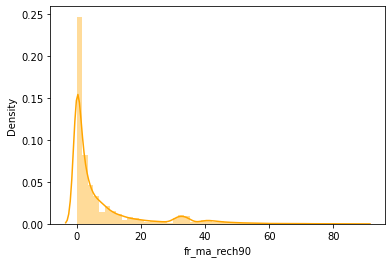

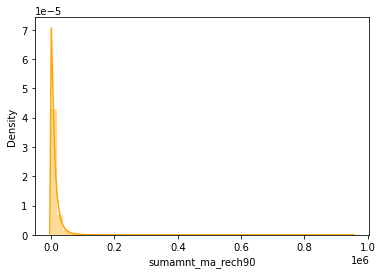

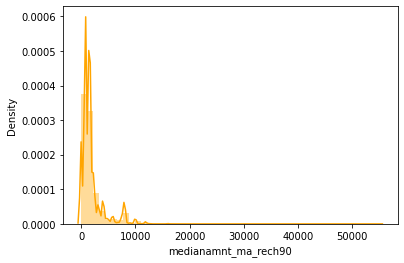

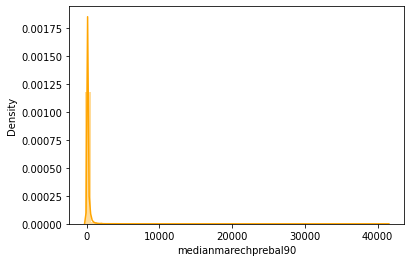

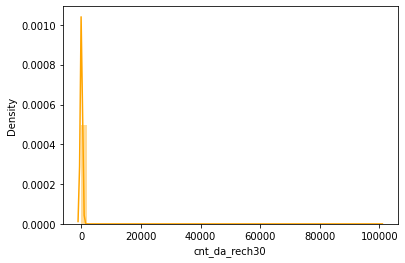

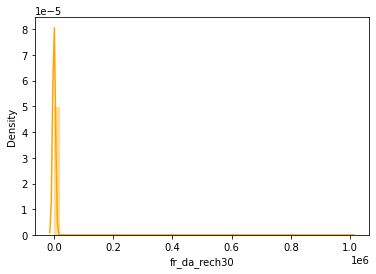

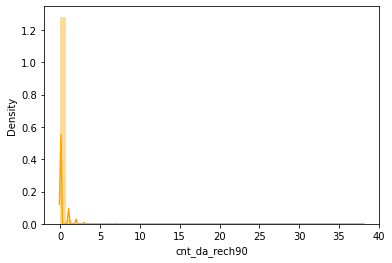

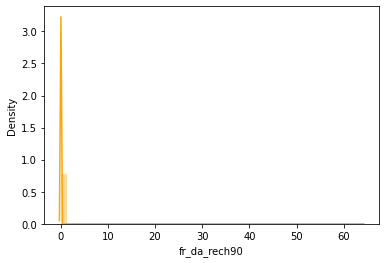

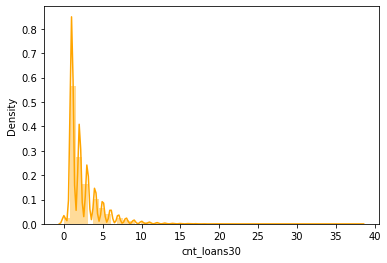

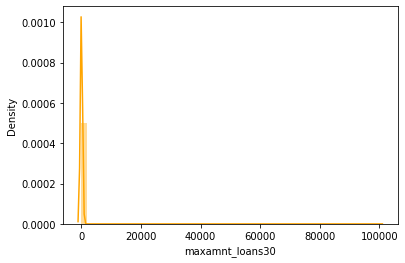

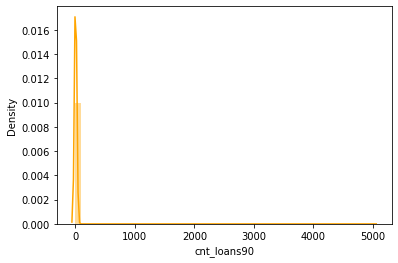

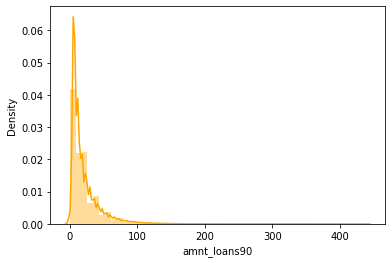

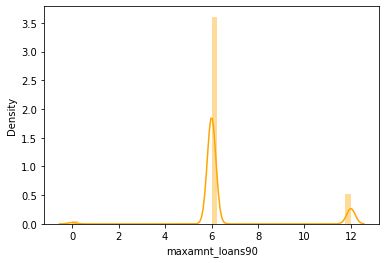

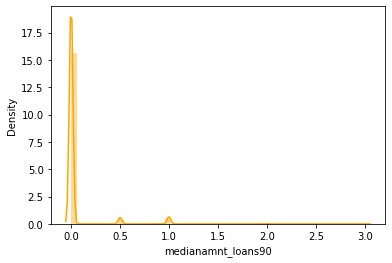

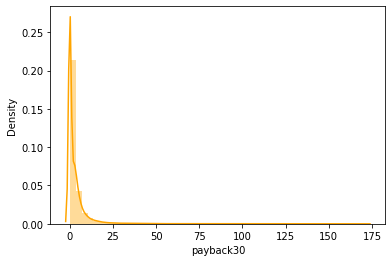

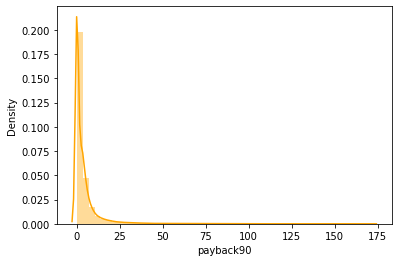

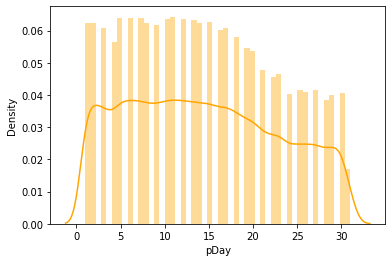

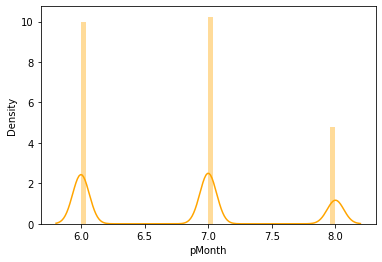

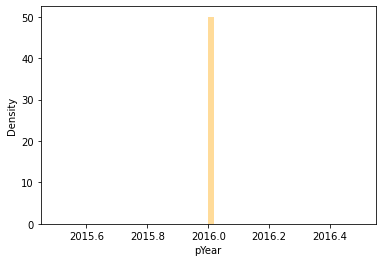

In [ ]:
#checking skewness
for col in data.describe().columns:
    sns.distplot(data[col],color='orange')
    plt.show()

In [ ]:
data.skew().sort_values(ascending=False)

medianmarechprebal90    43.576364
fr_da_rech90            28.959851
cnt_da_rech90           28.396293
cnt_da_rech30           17.749485
maxamnt_loans30         17.718074
cnt_loans90             16.717192
last_rech_date_ma       14.852116
fr_ma_rech30            14.822224
last_rech_date_da       14.781824
fr_da_rech30            14.728609
medianmarechprebal30    14.677544
aon                     10.365026
payback30                8.193009
sumamnt_ma_rech30        7.134012
payback90                6.763241
sumamnt_ma_rech90        5.231693
medianamnt_loans90       4.774958
rental90                 4.530925
daily_decr90             4.301490
last_rech_amt_ma         3.830612
medianamnt_ma_rech90     3.753115
cnt_ma_rech90            3.558616
medianamnt_ma_rech30     3.519213
cnt_ma_rech30            3.471313
amnt_loans90             3.165962
cnt_loans30              2.737584
fr_ma_rech90             2.250443
maxamnt_loans90          1.650198
pMonth                   0.351293
pDay          

In [33]:
#Creating a copy of our dataset
data2=data1.copy()
#Dropping the object columns
data1.drop(columns=['msisdn','pdate'],axis=1,inplace=True)
data1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(data1))
z

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,2.647896,0.103577,0.252299,0.276346,0.573844,0.558583,0.069637,0.069550,0.221637,0.464760,...,0.297116,0.342470,0.063284,0.247794,0.073493,0.439950,0.334212,0.229594,2.904700,2.394093
1,0.377658,0.097764,0.731037,0.553380,0.231788,0.036020,0.069303,0.069550,1.570178,0.699718,...,0.688582,0.342470,0.061871,0.247794,0.077941,0.439950,2.517690,0.229594,0.385630,0.419233
2,0.377658,0.100102,0.432011,0.429033,0.416020,0.447674,0.069619,0.069550,0.221637,0.699718,...,0.688582,0.687700,0.063284,0.247794,0.077941,0.666624,0.334212,0.229594,0.385630,0.419233
3,0.377658,0.103986,0.581326,0.555125,0.587935,0.576036,0.068914,0.069550,0.471344,0.934677,...,0.297116,0.342470,0.063284,0.247794,0.073493,0.439950,0.334212,0.229594,0.385630,0.419233
4,0.377658,0.094660,0.567293,0.543274,0.369886,0.413227,0.069600,0.069550,0.103151,0.710030,...,1.660218,1.383682,0.063284,0.247794,0.051250,0.693417,0.334212,0.229594,0.120890,0.192873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.377658,0.101833,0.567157,0.543159,0.372140,0.414910,0.069656,0.069550,0.836664,0.229802,...,0.297116,0.342470,0.063284,0.247794,0.073493,0.439950,0.334212,0.229594,0.272170,0.322221
209589,0.377658,0.092969,0.579622,0.553686,0.223791,0.304144,0.069600,0.069550,0.544737,0.005156,...,0.094351,0.002761,0.063284,0.247794,0.069044,0.213277,0.334212,0.229594,0.272170,0.322221
209590,0.377658,0.093788,0.700790,0.533194,0.735567,0.937500,0.069619,0.069550,0.221637,0.240114,...,0.485818,1.383682,0.061871,0.247794,0.055699,1.146764,2.517690,0.229594,0.068209,0.047356
209591,0.377658,0.084289,0.770755,0.594558,0.529352,0.433039,0.069637,0.068838,0.544737,0.240114,...,0.297116,0.002761,0.061871,0.247794,0.069044,0.013396,2.517690,0.229594,0.385630,0.599385


In [35]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587]), array([15, 15, 32, ..., 28, 26, 30]))


In [36]:
data1_new=data1[(z<3).all(axis=1)]
#Checking the shape
print(data.shape,'\t\t',data1_new.shape)

(186243, 33) 		 (161465, 33)


## loss is very high so we will not use this method

In [37]:
data.drop(['pDay','pYear'],axis=1,inplace=True)

## these column will not impact the model

In [38]:
data.columns

Index(['label', 'msisdn', 'aon', 'daily_decr90', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'maxamnt_loans30',
       'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90', 'pMonth'],
      dtype='object')

In [39]:
data.aon[1901:1904]

1901    1573.0
1903     240.0
1904    1045.0
Name: aon, dtype: float64

In [40]:
data.reset_index(drop=True, inplace=True)
data

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pMonth
0,0,21408I70789,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,...,0,2,6.0,2.0,12,6,0.0,29.000000,29.000000,7
1,1,76462I70374,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,...,0,1,12.0,1.0,12,12,0.0,0.000000,0.000000,8
2,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,0,1,6.0,1.0,6,6,0.0,0.000000,0.000000,8
3,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,0,2,6.0,2.0,12,6,0.0,0.000000,0.000000,6
4,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,0,7,6.0,7.0,42,6,0.0,2.333333,2.333333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186238,1,12227I90843,793.0,5356.210000,640.20,2.0,0.0,2309,4,16.0,...,0,5,6.0,5.0,30,6,0.0,5.200000,5.200000,7
186239,1,19900I95200,239.0,14704.900000,16775.60,8.0,0.0,3178,3,3.0,...,0,1,12.0,3.0,24,12,1.0,0.000000,30.000000,8
186240,1,22758I85348,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,...,0,2,6.0,2.0,12,6,0.0,1.000000,1.000000,6
186241,1,59712I82733,1732.0,12574.370000,984.58,2.0,38.0,773,5,4.0,...,0,2,12.0,3.0,24,12,0.0,0.000000,10.500000,7


## Treating outliers without data loss

In [41]:
df1 = data.copy()
data = data._get_numeric_data()


col_vals=data.columns
column_name=['aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90',
       'cnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pMonth']
for col in col_vals:
  if col in column_name:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    print(lower_bound,'\t',col,'\t',upper_bound)
    for i in range(0,len(data[col])):
      if data[col][i] <= lower_bound :
        data[col][i] = lower_bound
      elif data[col][i] >= upper_bound :
        data[col][i] = upper_bound


-866.0 	 aon 	 2086.0
-10746.852499999992 	 daily_decr90 	 18014.863499999985
-5385.1725 	 rental90 	 9743.287499999999
-8.0 	 last_rech_date_ma 	 16.0
0.0 	 last_rech_date_da 	 0.0
-1538.5 	 last_rech_amt_ma 	 4617.5
-5.0 	 cnt_ma_rech30 	 11.0
-9.0 	 fr_ma_rech30 	 15.0
-10155.0 	 sumamnt_ma_rech30 	 21029.0
-961.0 	 medianamnt_ma_rech30 	 3655.0
-100.61499999999991 	 medianmarechprebal30 	 193.02499999999986
-9.5 	 cnt_ma_rech90 	 18.5
-13.5 	 fr_ma_rech90 	 22.5
-16714.0 	 sumamnt_ma_rech90 	 34014.0
-953.5 	 medianamnt_ma_rech90 	 3650.5
-84.50000000000001 	 medianmarechprebal90 	 177.10000000000002
0.0 	 cnt_da_rech30 	 0.0
0.0 	 fr_da_rech30 	 0.0
0.0 	 cnt_da_rech90 	 0.0
0.0 	 fr_da_rech90 	 0.0
-2.0 	 cnt_loans30 	 6.0
6.0 	 maxamnt_loans30 	 6.0
-3.5 	 cnt_loans90 	 8.5
-21.0 	 amnt_loans90 	 51.0
6.0 	 maxamnt_loans90 	 6.0
0.0 	 medianamnt_loans90 	 0.0
-5.500000000000005 	 payback30 	 9.166666666666675
-6.75 	 payback90 	 11.25
4.5 	 pMonth 	 8.5


## Dropping th column which have lower and upper bound as zeroes

In [42]:
data.drop(['cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans90'],axis=1,inplace=True)

In [43]:
data.columns

Index(['label', 'aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'payback30', 'payback90', 'pMonth'],
      dtype='object')

In [44]:
# Variance inflation factor (checking for multi-collinearity)
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(data[[ 'aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
        'last_rech_amt_ma',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 
       'maxamnt_loans90', 'payback30', 'payback90', 'pMonth']].values, i) 
               for i in range(data[[ 'aon', 'daily_decr90', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'maxamnt_loans90', 'payback30', 'payback90', 'pMonth']].shape[1])], index=data[[ 'aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
       'last_rech_amt_ma',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'maxamnt_loans90', 'payback30', 'payback90', 'pMonth']].columns)

aon                     1.018988
daily_decr90            3.961237
rental90                1.626230
last_rech_date_ma       1.392927
last_rech_amt_ma        3.805692
fr_ma_rech30            1.442571
sumamnt_ma_rech30       7.747764
medianamnt_ma_rech30    5.327915
medianmarechprebal30    3.405069
fr_ma_rech90            1.400707
sumamnt_ma_rech90       8.897017
medianamnt_ma_rech90    5.847929
medianmarechprebal90    3.349379
cnt_loans30             6.179364
maxamnt_loans30         0.000000
cnt_loans90             6.561213
maxamnt_loans90         0.000000
payback30               3.773042
payback90               3.503314
pMonth                  2.224779
dtype: float64

In [45]:
data.drop(['amnt_loans90', 'cnt_ma_rech90','last_rech_amt_ma','cnt_ma_rech30',],axis=1,inplace=True)

In [46]:
features = data.drop(["label"],axis=1)
target = data["label"]
# Checking for Imbalance in the data
round(target.value_counts(normalize=True) * 100, 2)

1    86.11
0    13.89
Name: label, dtype: float64

In [47]:
# import library
from imblearn.over_sampling import SMOTE
import collections

smote = SMOTE()

# fit predictor and target variable
features_resampled, target_resampled  = smote.fit_resample(data, target)

print('Original dataset shape', collections.Counter(target))
print('Resample dataset shape', collections.Counter(target_resampled))

Original dataset shape Counter({1: 160383, 0: 25860})
Resample dataset shape Counter({0: 160383, 1: 160383})


In [48]:
# scaling the features
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
Features = pd.DataFrame(SC.fit_transform(features_resampled), columns=features_resampled.columns)

In [49]:
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split 
# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

## Logistic Regression

1.   without Sampling
2.   with sampling



Number transactions X_train dataset:  (130370, 20)
Number transactions y_train dataset:  (130370,)
Number transactions X_test dataset:  (55873, 20)
Number transactions y_test dataset:  (55873,)
              precision    recall  f1-score   support

           0       0.52      0.05      0.09      7667
           1       0.87      0.99      0.93     48206

    accuracy                           0.86     55873
   macro avg       0.69      0.52      0.51     55873
weighted avg       0.82      0.86      0.81     55873



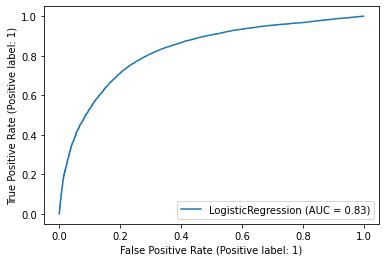

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 53) 

print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape)

lr = LogisticRegression(solver='lbfgs', max_iter=400) 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

import sklearn.metrics as metrics
metrics.plot_roc_curve(lr, X_test, y_test) 
plt.show()   

Accuracy of Logistic Regression: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48026
           1       1.00      1.00      1.00     48204

    accuracy                           1.00     96230
   macro avg       1.00      1.00      1.00     96230
weighted avg       1.00      1.00      1.00     96230



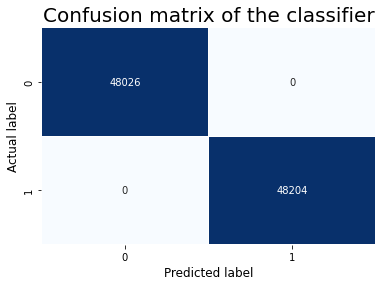

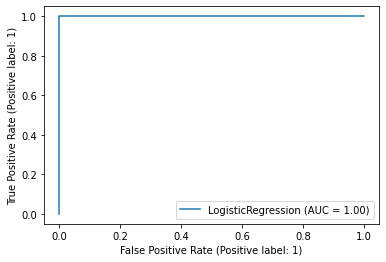

In [51]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(Features, target_resampled, test_size=0.3,random_state=53)
LR =LogisticRegression(solver="liblinear", random_state=1)

LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)

# calculate accuracy score
LR_accuracy = accuracy_score(y_test, pred_LR)
print('Accuracy of Logistic Regression: {:.2f}%'.format(LR_accuracy*100))

#classification report

report = classification_report(y_test,pred_LR)
print(report)
# Confusion Matrix

 
cm = confusion_matrix(y_test,pred_LR)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

metrics.plot_roc_curve(LR, x_test, y_test) 
plt.show()   

# 2. Guassian Naive Bayes
with sampling

[[48026     0]
 [    0 48204]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48026
           1       1.00      1.00      1.00     48204

    accuracy                           1.00     96230
   macro avg       1.00      1.00      1.00     96230
weighted avg       1.00      1.00      1.00     96230



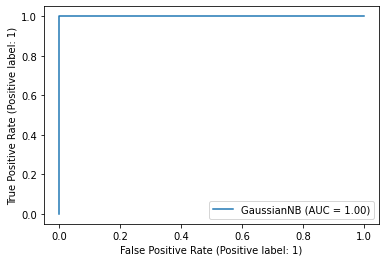

In [53]:
x_train, x_test, y_train, y_test = train_test_split(Features, target_resampled, test_size=0.3,random_state=53)
GNB =GaussianNB()

GNB.fit(x_train, y_train)

y_pred = GNB.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

metrics.plot_roc_curve(GNB, x_test, y_test) 
plt.show() 

without sampling

[[ 6037  1630]
 [14271 33935]]
              precision    recall  f1-score   support

           0       0.30      0.79      0.43      7667
           1       0.95      0.70      0.81     48206

    accuracy                           0.72     55873
   macro avg       0.63      0.75      0.62     55873
weighted avg       0.86      0.72      0.76     55873



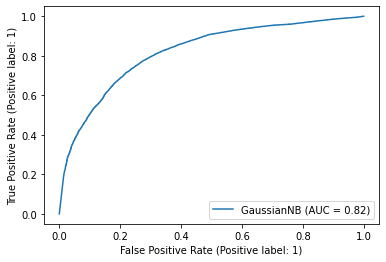

In [57]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3,random_state=53)
GNB =GaussianNB()

GNB.fit(x_train, y_train)

y_pred = GNB.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

metrics.plot_roc_curve(GNB, x_test, y_test) 
plt.show() 

# 3. Decision Tree
with sampling

[[48026     0]
 [    0 48204]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48026
           1       1.00      1.00      1.00     48204

    accuracy                           1.00     96230
   macro avg       1.00      1.00      1.00     96230
weighted avg       1.00      1.00      1.00     96230



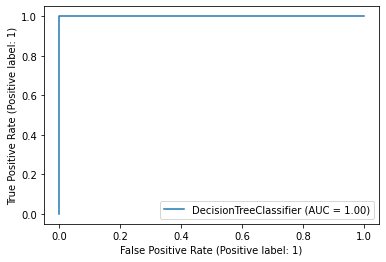

In [54]:
x_train, x_test, y_train, y_test = train_test_split(Features, target_resampled, test_size=0.3,random_state=53)
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred1 = clf.predict(x_test)

print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.show()  

without sampling

[[ 4050  3617]
 [ 4226 43980]]
              precision    recall  f1-score   support

           0       0.49      0.53      0.51      7667
           1       0.92      0.91      0.92     48206

    accuracy                           0.86     55873
   macro avg       0.71      0.72      0.71     55873
weighted avg       0.86      0.86      0.86     55873



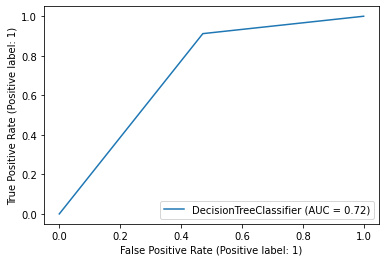

In [58]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3,random_state=53)
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred1 = clf.predict(x_test)

print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.show()  

# 4. Random Forest
with sampling

[[48026     0]
 [    0 48204]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48026
           1       1.00      1.00      1.00     48204

    accuracy                           1.00     96230
   macro avg       1.00      1.00      1.00     96230
weighted avg       1.00      1.00      1.00     96230



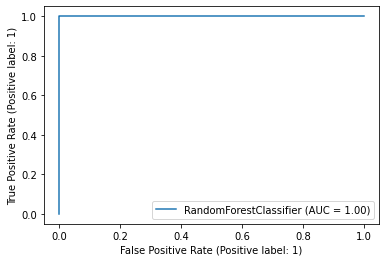

In [55]:
x_train, x_test, y_train, y_test = train_test_split(Features, target_resampled, test_size=0.3,random_state=53)
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
y_pred2=rfc.predict(x_test)

print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

metrics.plot_roc_curve(rfc, x_test, y_test) 
plt.show()  


without sampling

[[ 3682  3985]
 [ 1190 47016]]
              precision    recall  f1-score   support

           0       0.76      0.48      0.59      7667
           1       0.92      0.98      0.95     48206

    accuracy                           0.91     55873
   macro avg       0.84      0.73      0.77     55873
weighted avg       0.90      0.91      0.90     55873



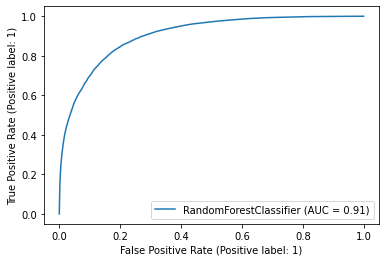

In [59]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3,random_state=53)
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
y_pred2=rfc.predict(x_test)

print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

metrics.plot_roc_curve(rfc, x_test, y_test) 
plt.show()  


# 5. Gradient Boost Classifier
 without sampling

[[ 3374  4293]
 [  956 47250]]
              precision    recall  f1-score   support

           0       0.78      0.44      0.56      7667
           1       0.92      0.98      0.95     48206

    accuracy                           0.91     55873
   macro avg       0.85      0.71      0.75     55873
weighted avg       0.90      0.91      0.89     55873



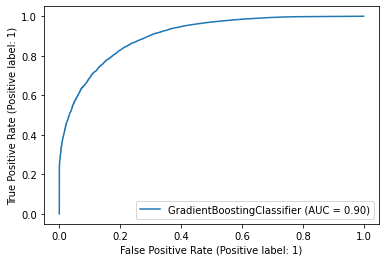

In [56]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3,random_state=53)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred3=gbc.predict(x_test)

print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

metrics.plot_roc_curve(gbc, x_test, y_test) 
plt.show()

with sampling

[[48026     0]
 [    0 48204]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48026
           1       1.00      1.00      1.00     48204

    accuracy                           1.00     96230
   macro avg       1.00      1.00      1.00     96230
weighted avg       1.00      1.00      1.00     96230



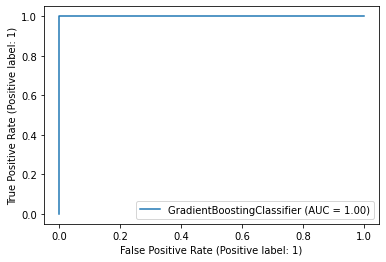

In [60]:
x_train, x_test, y_train, y_test = train_test_split(Features, target_resampled, test_size=0.3,random_state=53)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred3=gbc.predict(x_test)

print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

metrics.plot_roc_curve(gbc, x_test, y_test) 
plt.show()